In [25]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [72]:
import numpy as np
from sklearn import model_selection

indexes = np.random.randint(70000, size=5000)

data = mnist.data[indexes]
#print(data.shape)
target = mnist.target[indexes]

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    data, target, train_size=0.8
)


In [ ]:
from sklearn import neighbors

k = 10

clf = neighbors.KNeighborsClassifier(k)
clf.fit(xtrain, ytrain)

probas = clf.predict_proba(xtest)

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

itest = 4

images = data.reshape((-1, 28, 28))
plt.imshow(images[itest],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

print(probas[itest])

In [ ]:
#clf.score(xtest, ytest)
found_classes = clf.predict(xtest)

In [ ]:
for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / " + found_classes[itest] + res)

In [ ]:
from sklearn.model_selection import KFold

scores_k = [0 for i in range(0,16)]

nb_splits = 10

# k = Nombre de voisins à considérer
for k in range(2,16):
    clf = neighbors.KNeighborsClassifier(k)    
    kf = KFold(n_splits=nb_splits, shuffle=True)

    

    for train_indexes, test_indexes in kf.split(data):
        # Calcul des xtest/ytest/xtrain/ytrain
        xtrain = data[train_indexes]
        xtest = data[test_indexes]
        ytrain = target[train_indexes]
        ytest = target[test_indexes]
    
        clf.fit(xtrain, ytrain)
        
        print(".", end = '')
        scores_k[k] += clf.score(xtest, ytest) / nb_splits
        
    
    print(scores_k[k])

In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores_k2 = [0 for i in range(0,16)]

nb_splits = 10

# k = Nombre de voisins à considérer
for k in range(2,16):
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    
    score = np.mean(cross_val_score(clf, xtest, ytest, cv=10))

    print("K = " + str(k) + " -> " + str(score))
    scores_k2[k] = score


K = 2 -> 0.8566457737450117
K = 3 -> 0.8765479054641787
K = 4 -> 0.8764022380257599
K = 5 -> 0.8834478403308724
K = 6 -> 0.8726449191461215
K = 7 -> 0.8677731445476663
K = 8 -> 0.8656039034885799
K = 9 -> 0.8488901696003065
K = 10 -> 0.8570040177202808
K = 11 -> 0.8479183359916063
K = 12 -> 0.8518710331631019
K = 13 -> 0.8528459533510004
K = 14 -> 0.8507637667665019
K = 15 -> 0.8445966015698154


[0, 0, 0.9212, 0.933, 0.9299999999999999, 0.9306000000000001, 0.9241999999999999, 0.9262, 0.9239999999999999, 0.9232, 0.9234, 0.9196, 0.9159999999999999, 0.9192000000000002, 0.9156, 0.9122]


Text(0.5, 1.0, 'Score pour différentes valeurs de k')

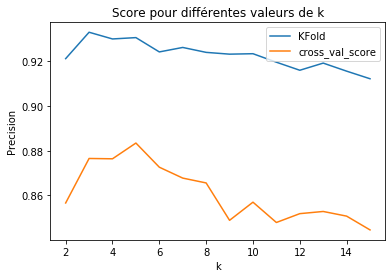

In [33]:
print(scores_k)

plt.plot([x for x in range(2, 16)], scores_k[2:])
plt.plot([x for x in range(2, 16)], scores_k2[2:])

plt.legend(['KFold', 'cross_val_score'], loc='upper right')
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Score pour différentes valeurs de k")

#sklearn tsne

# Résultat

Pour la suite, on prends la valeur k=5

In [102]:
from sklearn import neighbors

k=5
rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

scores_rate = []
for rate in rates:
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data, target, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    
    #print(str(len(ytrain)) + " - - - " + str(rate))
    score = clf.score(xtest, ytest)
    
    #score = np.mean(cross_val_score(clf, xtest, ytest, cv=10))

    print("Rate = " + str(rate) + " -> " + str(score))
    scores_rate.append(score)    

Rate = 0.1 -> 0.8373333333333334
Rate = 0.2 -> 0.889
Rate = 0.3 -> 0.8974285714285715
Rate = 0.4 -> 0.9076666666666666
Rate = 0.5 -> 0.9144
Rate = 0.6 -> 0.924
Rate = 0.7 -> 0.9226666666666666
Rate = 0.8 -> 0.937
Rate = 0.9 -> 0.928


Text(0.5, 1.0, 'Score pour différents pourcentages consacrés au train(k=5)')

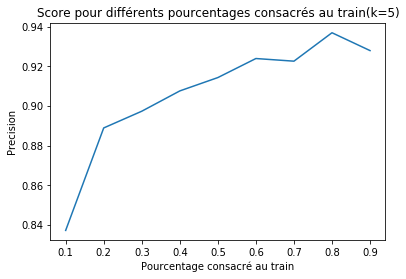

In [103]:
plt.plot([x for x in rates], scores_rate)

plt.xlabel("Pourcentage consacré au train")
plt.ylabel("Precision")
plt.title("Score pour différents pourcentages consacrés au train(k=" + str(k) +")")


# Résultat
Plus on alloue de données à l'entrainement, plus l'algorithme est efficace pour la classification.

In [105]:
from sklearn import neighbors

k=5
rate = 0.8
ps = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores_p = []

for p in ps:
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data, target, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k, p=p)
    clf.fit(xtrain, ytrain)
    
    score = clf.score(xtest, ytest)

    print("P = " + str(p) + " -> " + str(score))
    scores_p.append(score)    

P = 1 -> 0.914
P = 2 -> 0.927
P = 3 -> 0.938
P = 4 -> 0.941
P = 5 -> 0.936
P = 6 -> 0.937
P = 7 -> 0.948
P = 8 -> 0.941
P = 9 -> 0.941
P = 10 -> 0.945


Text(0.5, 1.0, 'Score pour différentes valeurs de p(k=5)')

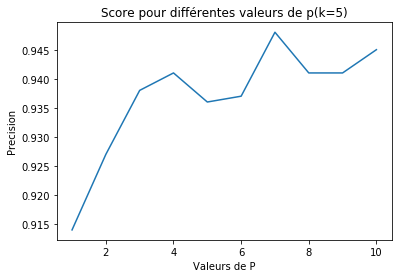

In [106]:
plt.plot([x for x in ps], scores_p)

plt.xlabel("Valeurs de P")
plt.ylabel("Precision")
plt.title("Score pour différentes valeurs de p(k=" + str(k) +")")


# Résultat

Augmentation de la précision en augmentant la norme utilisée